![Image](./img/dataset-diagram-logo.png)


**Objectif** : xarray c'est comme pandas pour le côté "labellisations" mais **ndim** -> nombre de dimensions illimité
- On n'appelle plus cela des DataFrame mais des DataArray (qui peuvent être rangés dans des Dataset)
- Ca permet de ranger rigoureseument ses données ...
- ... et de faire des opérations et/ou des figures de manière très facile et explicite

In [11]:
import numpy as np
import pandas as pd
import xarray as xr

##  Initialiser un DataArray

In [15]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()> Size: 8B
array(2)

In [41]:
da = xr.DataArray(data = np.random.randint(10, size=(2, 3)), dims=('x', 'y'), coords={'x': ['a', 'b'], 'y':['A','B','C']}, attrs = {'units':'test'})
da

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 2, 1],
       [9, 0, 3]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

## Attribute of DataArray

In [42]:
print('values : ', da.values)
print('dims : ', da.dims)
print('coords : ', da.coords)
print('attrs metadata', da.attrs)

values :  [[3 2 1]
 [9 0 3]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
attrs metadata {'units': 'test'}


## Indexing

### numpy like

In [43]:
da[:, :2]

<xarray.DataArray (x: 2, y: 2)> Size: 32B
array([[3, 2],
       [9, 0]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 8B 'A' 'B'
Attributes:
    units:    test

### pandas like with loc[]

In [44]:
da.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 2, 1],
       [9, 0, 3]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

### with isel()

In [45]:
da.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)> Size: 32B
array([[3, 1],
       [9, 3]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 8B 'A' 'C'
Attributes:
    units:    test

### with sel()

In [46]:
da.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)> Size: 24B
array([[3, 2, 1]])
Coordinates:
  * x        (x) <U1 4B 'a'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:    test

## Attributes (metadata) useful for plotting

In [47]:
da.attrs['long_name'] = 'random useless stuff'
da.attrs['units'] = 'mV'
da

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 2, 1],
       [9, 0, 3]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:      mV
    long_name:  random useless stuff

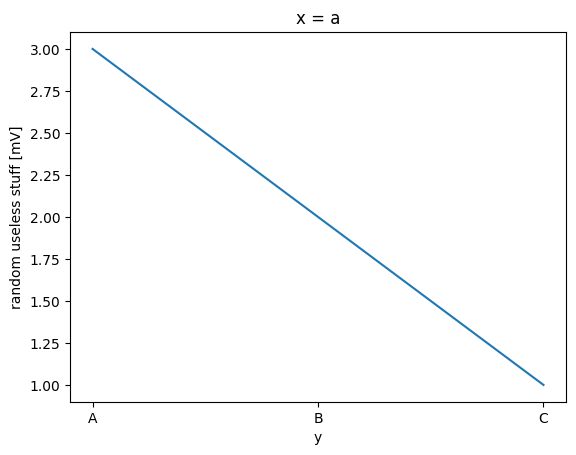

In [48]:
da.sel(x='a').plot()

## Computation / aggregation

In [49]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
da.mean(dim='y')

<xarray.DataArray (x: 2)> Size: 16B
array([2., 4.])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'

## GroupBy

In [50]:
da

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 2, 1],
       [9, 0, 3]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'
Attributes:
    units:      mV
    long_name:  random useless stuff

In [51]:
labels = xr.DataArray(data = ['E', 'F', 'E'], coords = [da.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)> Size: 12B
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) <U1 12B 'A' 'B' 'C'

In [52]:
da1 = da.groupby(labels).sum('y')
da1

<xarray.DataArray (x: 2, labels: 2)> Size: 32B
array([[ 4,  2],
       [12,  0]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * labels   (labels) object 16B 'E' 'F'
Attributes:
    units:      mV
    long_name:  random useless stuff

In [53]:
da2 = da.groupby(labels).apply(lambda x: x - x.min())
da2

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[2, 2, 0],
       [8, 0, 2]])
Coordinates:
  * x        (x) <U1 8B 'a' 'b'
  * y        (y) <U1 12B 'A' 'B' 'C'

## Pandas

In [54]:
series = da.to_series()
series

x  y
a  A    3
   B    2
   C    1
b  A    9
   B    0
   C    3
dtype: int64

In [55]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[3, 2, 1],
       [9, 0, 3]])
Coordinates:
  * x        (x) object 16B 'a' 'b'
  * y        (y) object 24B 'A' 'B' 'C'

## Dataset = DataArrays in the same place

In [56]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

da1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

da2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': da1,
                 'time_freq' : da2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset> Size: 176kB
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 8kB 0.0 0.01 0.02 0.03 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 160B 10.0 12.0 14.0 16.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 8kB 2.235 -1.706 -0.6055 ... 1.035 0.3057 -1.395
    time_freq   (times, freqs) float64 160kB -0.2974 0.07266 ... 0.7747 -1.94
    one_scalar  float64 8B 3.142

In [57]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)> Size: 8kB
array([ 2.23535217e+00, -1.70636752e+00, -6.05519489e-01, -1.80149269e+00,
        5.68753083e-02,  7.80389208e-01,  7.61038546e-01,  8.42345788e-01,
       -8.20905646e-01,  2.29582400e+00,  9.46181908e-01, -1.60160197e-01,
       -1.32248861e+00,  1.82221263e+00, -4.86376315e-01,  7.99780856e-01,
        1.24945805e+00, -1.37510178e+00,  1.22818474e+00, -5.79738180e-02,
        5.50754882e-01,  1.05818653e+00,  6.71532210e-01, -4.07536447e-01,
       -1.77321510e-02, -5.39631816e-01, -1.37050828e+00, -9.86132741e-01,
       -4.83247001e-01, -1.68720399e-01,  6.98352119e-01, -2.86910956e-01,
       -8.85493804e-01, -8.43391531e-01, -4.17957864e-01,  4.15327139e-01,
        1.35283128e+00, -3.75990544e-01, -1.95962807e-01, -5.64924098e-01,
        1.11240660e-01,  1.00410285e+00, -2.82492244e-01, -2.35066754e-01,
        5.25906462e-01,  3.61840382e-01, -1.07374532e+00, -1.15948981e-01,
       -3.20165543e-01, -1.79178395e+00, -1.17008138e+00, -1.71977462e+00,
       -4.45862190e-01, -8.35725267e-01, -1.54701747e-01,  2.72928728e-01,
       -1.80242648e-01,  7.84083075e-01, -9.17358026e-01,  6.34365419e-01,
        1.59345251e+00, -1.19046576e+00,  1.80100430e+00, -3.76997689e-01,
       -1.36878281e+00, -2.00482401e-01,  8.91013181e-01, -1.87673734e+00,
        5.71956790e-01,  1.73295064e+00,  7.14065457e-02,  9.86064287e-01,
       -4.66298415e-01,  2.77679196e+00,  7.97728372e-01,  1.17725480e-01,
        3.57048169e-01, -1.86151809e+00, -5.79455624e-01, -4.35692340e-01,
...
       -1.93935500e+00,  2.50812182e-01, -3.26205976e-02, -6.73639386e-01,
        1.08107632e+00,  2.10844732e-01, -7.55236826e-01, -1.39622461e+00,
        9.26728515e-02,  1.30376851e-01,  7.44864029e-02,  9.38124900e-02,
        2.47843419e+00,  1.15954124e+00,  7.15864590e-01,  8.50730863e-01,
       -5.60701402e-02,  1.48151886e+00,  2.95588355e-01,  3.08662002e-01,
        1.38176062e+00, -4.62477312e-01,  1.71038103e+00, -2.42943893e+00,
        1.05869821e+00, -1.20628334e+00,  6.47440624e-01, -7.48623595e-01,
       -3.13429964e-01, -1.33916353e+00, -6.12366940e-01,  3.11333065e-01,
       -1.61891857e+00, -1.57682983e-01,  9.43008238e-01,  1.39772311e+00,
        1.17887460e+00, -4.38815149e-01,  1.81621880e+00, -2.56093224e+00,
        4.18849101e-01,  1.94215141e+00,  3.42362234e-01,  1.16843127e+00,
        1.19573038e+00,  7.04943044e-01,  8.55226184e-01, -6.21622111e-01,
        9.46508495e-01,  1.07868622e+00, -3.67263100e-01, -5.85662249e-01,
        4.08992952e-01, -7.53195430e-01,  3.92349329e-01,  5.08019837e-01,
       -1.26931120e+00, -4.94927816e-01, -5.62335334e-01, -2.08799398e-01,
       -2.52305893e-01, -2.00441504e-01,  4.58011419e-01, -2.69411836e-01,
       -6.57539790e-01, -2.50289321e-01, -8.68194193e-01, -6.09003344e-01,
       -4.54090844e-01,  1.23529451e+00, -8.28892230e-01, -2.08658830e+00,
       -3.14603301e-01, -1.71147847e+00, -9.61017783e-02,  7.81922604e-01,
       -1.12519869e+00,  1.03536213e+00,  3.05717715e-01, -1.39460031e+00])
Coordinates:
  * times    (times) float64 8kB 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [58]:
ds.isel(times=slice(0,100))

<xarray.Dataset> Size: 18kB
Dimensions:     (times: 100, freqs: 20)
Coordinates:
  * times       (times) float64 800B 0.0 0.01 0.02 0.03 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 160B 10.0 12.0 14.0 16.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 800B 2.235 -1.706 -0.6055 ... 1.314 -1.144 1.414
    time_freq   (times, freqs) float64 16kB -0.2974 0.07266 ... -1.228 -0.2962
    one_scalar  float64 8B 3.142

## Plotting with xarray

### Plot 1D

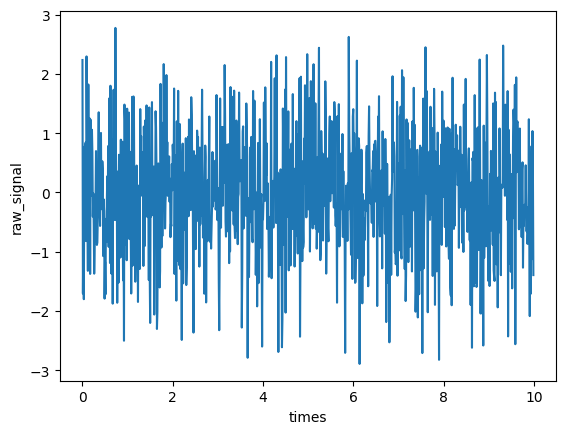

In [59]:
ds['raw_signal'].plot()

### Plot 2D

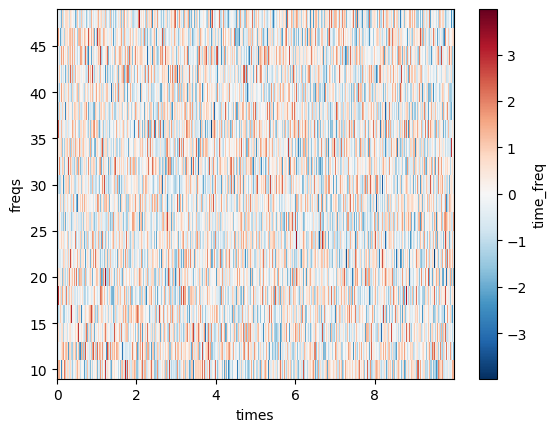

In [ ]:
ds['time_freq'].plot(x = 'times', y = 'freqs') # xarray choisit automatiquement la bonne méthode ici

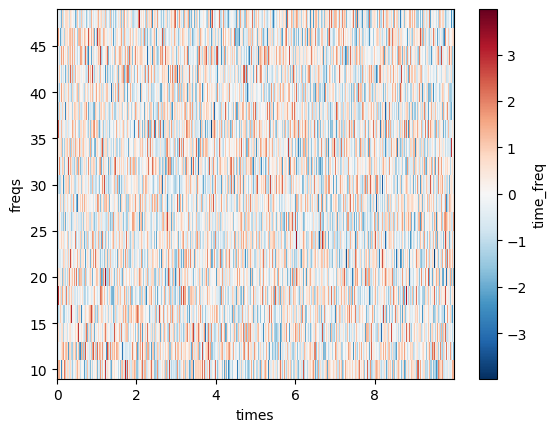

In [64]:
ds['time_freq'].plot.pcolormesh(x = 'times', y = 'freqs') # ici on demande explicitement un pcolormesh

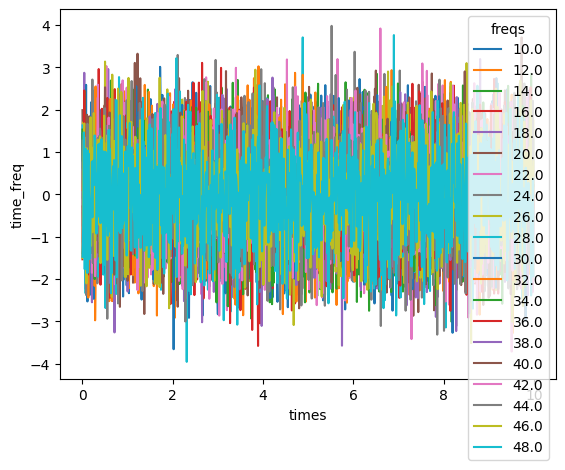

In [66]:
ds['time_freq'].plot.line(x = 'times', hue = 'freqs') # alors que ici on demande un plot.line avec une superposition (hue)

## NetCDF (xarray format based on HDF5)

In [26]:
ds.to_netcdf('example.nc')

In [27]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (times: 1000, freqs: 20)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    time_freq   (times, freqs) float64 ...
    raw_signal  (times) float64 ...
    one_scalar  float64 ...

## zarr (xarray format based on zarr)

In [28]:
ds.to_zarr('example.zarr')

In [29]:
xr.open_dataset('example.zarr')

/home/samuel/.virtualenvs/py3.11/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
Data variables:
    one_scalar  float64 ...
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manière multi-dimensionelle
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimensions comme `(trial, question)` avec trial allant de 1 à 4 et question étant 'a', 'b', 'c'

## Solution 1

## Exercice 2

 * Localiser les réponses aux questions du sujet HJ02 durant sa première session et suite au premier trial

## Solution 2

## Exercice 3

 * Trouver une façon intelligente de faire un plot représentant toutes les informations sur une seule figure

## Solution 3